## Problem 4: Logistic Regression (without LASSO)

In the cell below, we read in the data.

In [5]:
# allow inline plots
%matplotlib notebook

# importing necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt

# reading in the CSV data
data = pd.read_csv('spam.data.csv', delimiter = ' ', header = None)

# setting all columns but last as inputs (X) and last column as output (Y)
X, y = data.iloc[:, :-1].values, data.iloc[:, -1:].values.flatten()

Next, we initialize a logisitic regression classifier (sklearn.linear_model.LogisticRegression).

We wish to perform the regression at first without any regularization, but there is no way to do this directly. We use the following workaround to achieve this. We initialize the classifier with the LASSO regularization method (```penalty = 'l1'```) and set the regularization strength $\lambda$ very close to zero ($1 \times 10^{-50}$). We do this by specifying a very large inverse regularization strength (```C = 1e50```).

In [6]:
from sklearn import linear_model

clf_logistic = linear_model.LogisticRegression(penalty = 'l1', C = 1e50) #C = .7 optimum

Next, we perform 10-fold cross validation on the dataset and find the mean classification error rate to be $9.09\% \pm 1.19\%$.

We also display the feature weights obtained after training the model on the whole dataset. Feature numbers 27 and 41 display large negative weights, indicating that they may be strongly anti-correlated with the probability of an email being spam. Feature 53 has the largest positive weight in the model. The last 3 features (55, 56 and 57) contribute the least to the model.

10-fold cross validation error = 9.09% +- 1.19%


<IPython.core.display.Javascript object>


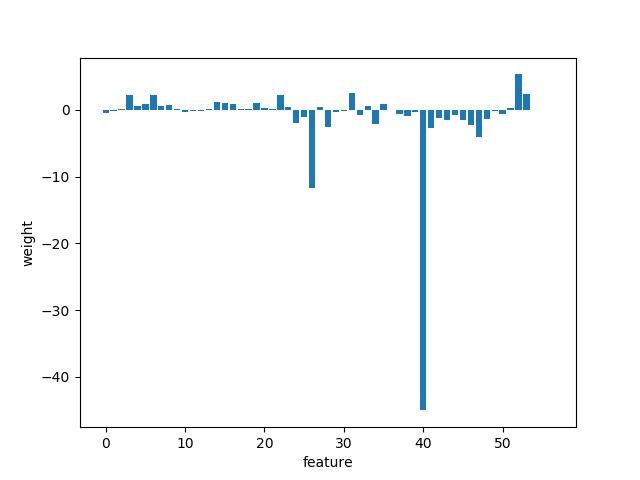

<Container object of 57 artists>

In [7]:
from sklearn.model_selection import cross_val_score
from scipy import stats

# compute cross validation error
cv_errs = 1. - cross_val_score(clf_logistic, X, y, cv = 10)
cv_errs_mean = round(np.mean(cv_errs) * 100, 2)
cv_errs_sterr = round(stats.sem(cv_errs) * 100, 2)
print '10-fold cross validation error = ' + str(cv_errs_mean) + '% +- ' \
+ str(cv_errs_sterr) +'%'

# training the model and recording the weights
clf_logistic.fit(X, y)
weights = clf_logistic.coef_[0]

#plotting the weights of the different featurs in the model
ax = plt.subplots()[1]; ax.set_xlabel('feature'); ax.set_ylabel('weight')
ax.bar(range(len(weights)), weights)

## Problem 5: Logistic Regression with LASSO

We check the 10-fold cross-validation error (CVE) when using LASSO with the logistic regression model, for different values of the regularization strength $\lambda$. We first check the CVE for a broad range of $\lambda$ i.e. from 0.1 to 100. Using the results obtained, we zoom in more and more on the region that appears to contain the global minimum of CVE, in order to identify the corresponding optimal $\lambda$.

<IPython.core.display.Javascript object>


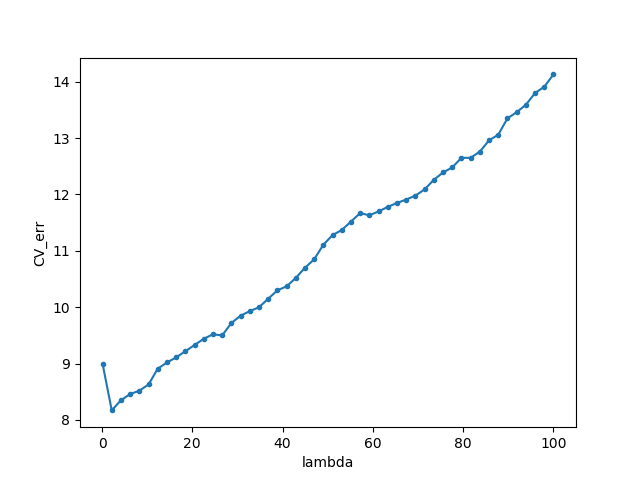

lambda_best = 2.1387755102 for CVE_min = 8.17


In [8]:
# defining model with variable lambda for LASSO
clf_lasso = lambda lam: linear_model.LogisticRegression(penalty = 'l1', C = 1./lam)

# function to return CVEs corresponding to lambdas
def cvs_for_lambdas(lambdas):
    cv_means_dict = {'lambdas': lambdas, 'means': [], 'errs': []}
    for lam in cv_means_dict['lambdas']:
        cv_errs = 1. - cross_val_score(clf_lasso(lam), X, y, cv = 10)
        cv_means_dict['means'].append(round(np.mean(cv_errs) * 100, 2))
        cv_means_dict['errs'].append(round(stats.sem(cv_errs) * 100, 2))
    return cv_means_dict

# obtaining CVEs for lambda from 0.1 to 100
cv_means_dict = cvs_for_lambdas(lambdas = np.linspace(start = 0.1, stop = 100, num = 50))

# plotting CVEs against lambdas
ax = plt.subplots()[1]; ax.set_xlabel('lambda'); ax.set_ylabel('CV_err')
ax.errorbar(cv_means_dict['lambdas'], cv_means_dict['means'], linestyle = '-', marker = '.')

# printing optimal lambda
print 'lambda_best = ' + str(cv_means_dict['lambdas'][np.argmin(cv_means_dict['means'])]) \
+ ' for CVE_min = ' + str(np.amin(cv_means_dict['means']))

lambda_best = 2.34897959184 for CVE_min = 8.13\%


<IPython.core.display.Javascript object>


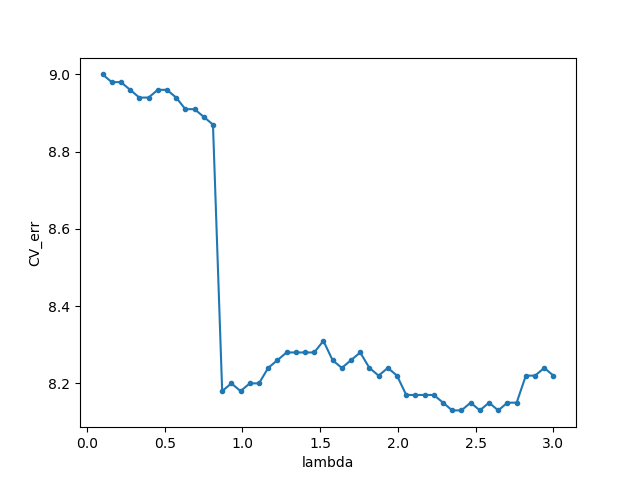

<Container object of 3 artists>

In [9]:
# obtaining CVEs for lambda from 0.1 to 3
cv_means_dict = cvs_for_lambdas(lambdas = np.linspace(start = 0.1, stop = 3, num = 50))

# printing optimal lambda
print 'lambda_best = ' + str(cv_means_dict['lambdas'][np.argmin(cv_means_dict['means'])]) \
+ ' for CVE_min = ' + str(np.amin(cv_means_dict['means'])) + '\%'

# plotting CVEs against lambdas
ax = plt.subplots()[1]; ax.set_xlabel('lambda'); ax.set_ylabel('CV_err')
ax.errorbar(cv_means_dict['lambdas'], cv_means_dict['means'], linestyle = '-', marker = '.')

<IPython.core.display.Javascript object>


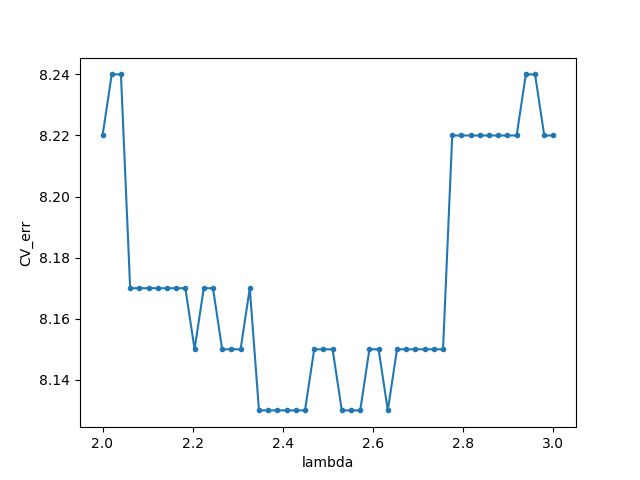

lambda_best = 2.34693877551 for CVE_min = 8.13


In [10]:
# obtaining CVEs for lambda from 0.1 to 3
cv_means_dict = cvs_for_lambdas(lambdas = np.linspace(start = 2, stop = 3, num = 50))

# plotting CVEs against lambdas
ax = plt.subplots()[1]; ax.set_xlabel('lambda'); ax.set_ylabel('CV_err')
ax.errorbar(cv_means_dict['lambdas'], cv_means_dict['means'], linestyle = '-', marker = '.')

# printing optimal lambda
print 'lambda_best = ' + str(cv_means_dict['lambdas'][np.argmin(cv_means_dict['means'])]) \
+ ' for CVE_min = ' + str(np.amin(cv_means_dict['means']))

<IPython.core.display.Javascript object>


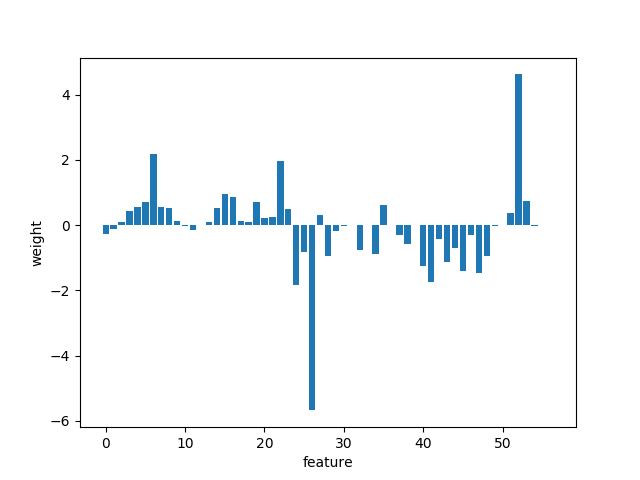

<Container object of 57 artists>

In [11]:
# training the model and recording the weights
clf_lasso_opt = clf_lasso(lam = 2.408)
clf_lasso_opt.fit(X, y)
weights = clf_lasso_opt.coef_[0]

#plotting the weights of the different featurs in the model
ax = plt.subplots()[1]; ax.set_xlabel('feature'); ax.set_ylabel('weight')
ax.bar(range(len(weights)), weights)